# Logistic Regression để nhận dạng ảnh 🐱

Trong bài tập này, các bạn sẽ xây dựng một logistic regression classifier để phân biệt một bức hình có mèo hay không. Các bạn sẽ cài đặt thuật toán gradient descent để tối ưu các thông số w và b của logistic regression. 


## 1 - Packages ##

Đầu tiên, hãy run cell dưới để import các packages cần thiết.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

def load_dataset():
    train_dataset = h5py.File('C:/Users/phucvan/Desktop/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
    test_dataset = h5py.File('C:/Users/phucvan/Desktop/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## 2 - Nhìn nhận bài toán ##

Các bạn có một dataset ("data.h5") chứa:
    - một training set chứa m_train bức ảnh được dán nhãn là cat (y=1) hoặc non-cat (y=0)
    - một test set chứa m_test bức ảnh cat hoặc non-cat
    - mỗi bức ảnh có kích thước (num_px, num_px, 3) trong đó 3 là số kênh (RGB). 

Các bạn sẽ xây dựng một thuật toán logistic regression để phân biệt một bức ảnh là cat hay non-cat.

Để làm quen với dataset, hãy chạy cell bên dưới để load dữ liệu.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Mỗi dòng của biến train_set_x_orig và test_set_x_orig là một mảng chứa giá trị của tất cả các điểm ảnh của một bức ảnh. 

Các bạn có thể hiển thị một bức ảnh ở vị trí 'index' và xem nhãn của nó bằng các chạy cell dưới đây. 

y = [1], it's a 'cat' picture.


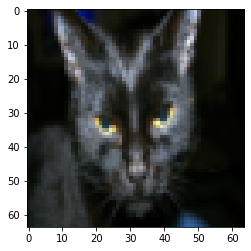

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


Hãy chạy cell dưới đây để tìm chiều của dữ liệu. 

    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)

In [4]:
m_train = train_set_x_orig.shape[0] 
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

Tiếp theo, bạn cần làm phẳng (flatten) các bức ảnh kích thước (num_px, num_px, 3) thành một vector cột kích thước (num_px $*$ num_px $*$ 3, 1). 

Sau bước này, tập train (và test) là một ma trận gồm m_train (và m_test) cột trong đó mỗi cột là một bức ảnh. 



In [5]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


Do giá trị pixel từ 0 đến 255, để **chuẩn hóa dữ liệu**, ta chia tất cả giá trị của dataset cho 255.


In [6]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


## 3 - Cấu trúc chung của thuật toán ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

Cấu trúc của thuật toán Logistic Regression được mô tả qua hình dưới.
<div>
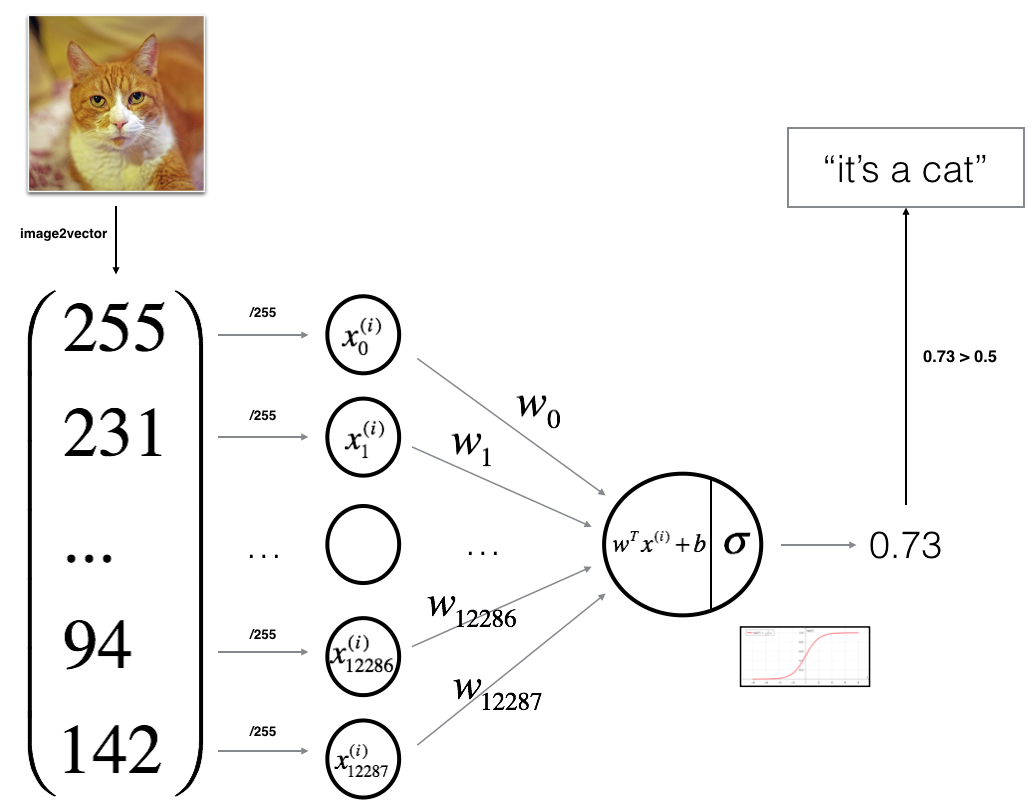
</div>



**Các công thức toán của thuật toán**:

Với mỗi bức ảnh (là một vector cột) $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Cost được tính bằng cách tính tổng Loss của tất cả bức ảnh training:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$



## 4 - Xây dựng các thành phần của thuật toán ## 

Các bước chính để xây dựng một Neural Network là:
1. Xác định cấu trúc của mô hình ( ví dụ số lượng features của dữ liệu, ở đây là kích thước của mỗi bức ảnh (vector cột)).
2. Khởi tạo các thông số của mô hình
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Các bước 1-3 sẽ được cài đặt qua các hàm riêng biệt, sau đó ta sẽ lắp ghép chúng lại để tạo thành mô hình 'model()'.


### 4.1 - Cài đặt sigmoid activation function

Bắt đầu vào bài tập nhé! 😅😅😅

Bài tập 1: Hãy cài đặt hàm sigmoid theo công thức dưới đây: 

$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$ 

Dùng hàm np.exp(z) trong python 

In [7]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    a -- sigmoid(z)
    """

    ### START CODE HERE ###
    a = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return a

In [8]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Khởi tạo parameters

Bài tập 2: Viết hàm khởi tạo vector cột w và bias b.


In [9]:
#FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    Hàm này sẽ khởi tạo một vector cột w toàn zero kích thước (dim, 1) và khởi tạo b bằng 0.
    
    Argument:
    dim -- kích thước vector cột w 
    
    Returns:
    w -- vector cột khởi tạo với kích thước (dim, 1)
    b -- giá trị bias khởi tạo kích thước (1, 1) 
    """
    
    ### START CODE HERE ###
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [10]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

Khi đầu vào là bức ảnh, w sẽ là vector cột kích thước (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Bài tập 3: Viết hàm forward và backward propagation 



Forward Propagation:
- Đầu vào X, w, b
- Tính $A = \sigma(w^T X + b)$
- Tính cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Backward Propagation:

- Đầu vào A, Y
- Tính $dw = \frac{1}{m}X(A-Y)^T $
- Tính $db = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)})$

Nhắc lại  &nbsp;&nbsp;    $ dw = \frac{\partial J}{\partial w} $  &nbsp;&nbsp;     $ db = \frac{\partial J}{\partial b} $

Dùng hàm np.log(), np.dot() trong python.

In [11]:
#FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Hàm này sẽ tính giá trị của cost function (chiều forward) và sau đó tính gradient của các thông số (chiều backward)

    Arguments:
    w -- vector cột weights kích thước (num_px * num_px * 3, 1)
    b -- bias (là một số thực)
    X -- ma trận dữ liệu đầu vào với kích thước (num_px * num_px * 3, số lượng ảnh training)
    Y -- vector hàng chứa các nhãn thật (0 nếu non-cat, 1 nếu cat) với kích thước (1, number of examples)

    Return:
    cost -- negative log-likelihood cost 
    grads -- từ điển chứa giá trị dw và db với
    dw -- gradient của w, do đó dw có cùng kích thước với w
    db -- gradient của b, do đó db có cùng kích thước với b
    

    """
    
    m = X.shape[1]
    # FORWARD PROPAGATION (từ X, w, b tính A. Sau đó từ A và Y tính cost)
    ### START CODE HERE ### 
    A = sigmoid(np.dot(w.T,X)+b)                               # compute activation
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (tính dz, dw, db)
    ### START CODE HERE ### 
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.4 - Optimization sử dụng gradient descent

Bài tập 4: Viết hàm optimization.

In [13]:
# FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Hàm này sẽ optimizes w và b sử dụng gradient descent
    
    Arguments:
    w -- vector cột weights kích thước (num_px * num_px * 3, 1)
    b -- bias (là một số thực)
    X -- ma trận dữ liệu training kích thước (num_px * num_px * 3, số lượng ảnh training)
    Y -- vector hàng chứa các nhãn đúng (0 nếu non-cat, 1 nếu cat) với kích thước (1, số lượng ảnh training)
    num_iterations -- số vòng lặp cho optimization
    learning_rate -- learning rate
    print_cost -- True để in ra giá trị loss ở mỗi 100 bước lặp
    
    Returns:
    params -- dictionary chứa w và b
    grads -- dictionary chứa dw và db
    costs -- list các giá trị cost thu được trong quá trình chạy (dùng để plot learning curve).
    

    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Tính Cost and gradient dùng hàm propagate
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Lấy giá trị dw và db từ grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update lại các giá trị w và b
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*b
        ### END CODE HERE ###
        
        # Lưu lại giá trị costs
        if i % 100 == 0:
            costs.append(cost)
        
        # In ra cost mỗi 100 lần lặp
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### 4.5 - Hàm predict

Với thông số w và b đã được trained, ta có thể dự đoán nhãn của một hoặc nhiều tấm ảnh đầu vào.

Có 2 bước cần phải thực hiện trong hàm predict(): 

1. Tính giá trị activation $\hat{Y} = A = \sigma(w^T X + b)$ (là một vector hàng gồm con số trong khoảng (0,1))

2. Chuyển giá trị activation $\hat{Y}$ ở trên thành nhãn 0 (nếu activation <= 0.5) or 1 (nếu activation > 0.5).

In [14]:
# FUNCTION: predict

def predict(w, b, X):
    '''
    Dự đoán nhãn 0 hay 1 của dữ liệu đầu vào X sử dụng (w, b)
    
    Arguments:
    w -- weights, kích thước (num_px * num_px * 3, 1)
    b -- bias (một số thực)
    X -- dữ liệu đầu vào kích thước (num_px * num_px * 3, số lượng ảnh)
    
    Returns:
    Y_prediction -- một vector hàng chứa tất cả nhãn dự đoán của các tấm ảnh trong X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Tính giá trị activation ứng với các tấm ảnh trong X
    A = sigmoid(np.dot(w.T, X) + b)
    
    
        
    # Chuyển các giá trị activation có giá trị trong khoảng (0,1) sang nhãn (0 hoặc 1)    
    Y_prediction = 1. * (A > 0.5)

    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [15]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


## 5 - Kết hợp tất cả các hàm để tạo thành mô hình dự đoán ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [39]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    
    # khởi tạo
    w, b = initialize_with_zeros(X_train.shape[0])

    # optimize
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # lấy ra giá trị thông số w và b từ dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Test thử độ chính xác của mô hình (với w và b vừa huấn luyện được) trên tập train và tập test 
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)



    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Đến lúc thử nghiệm mô hình rồi 😻

In [40]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


## 6 - Phân tích kết quả ##

Thử plot cost function giảm thế nào qua các bước lặp.

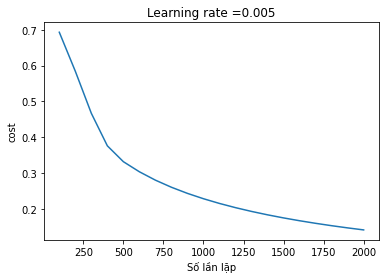

In [41]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
x=((np.arange(len(costs))+1)*100).tolist()
y=costs.tolist()
plt.plot(x,y)
plt.ylabel('cost')
plt.xlabel('Số lần lặp')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Vẫn còn một bài tập nữa 😂😂😂

Bài tập 5: 

Ta thấy cost function giảm theo số lần lặp. Khi chạy trên tập train, độ chính xác sẽ giảm theo số lần lặp. Điều này chứng tỏ mô hình học được. Nhưng mô hình hiện tại có dấu hiệu overfitting (độ chính xác trên tập test thấp hơn nhiều trên tập train). Hãy kiểm chứng điều đó bằng cách thử huấn luyện mô hình với số lần lặp (num_iterations) khác nhau (1000, 2000, 3000, 4000) và vẽ biểu đồ hiển thị độ chính xác train_accuracy và test_accuracy ứng với các số lần lặp này.

số lần lặp: 1000

train accuracy: 96.65071770334929 %

test accuracy: 72.0 %
<div>
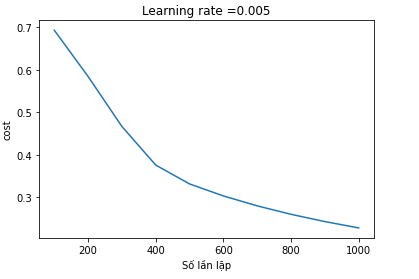
</div>

số lần lặp: 2000

train accuracy: 99.04306220095694 %

test accuracy: 70.0 %
<div>
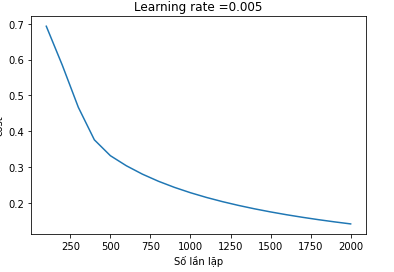
</div>

số lần lặp: 3000

train accuracy: 99.52153110047847 %

test accuracy: 68.0 %
<div>
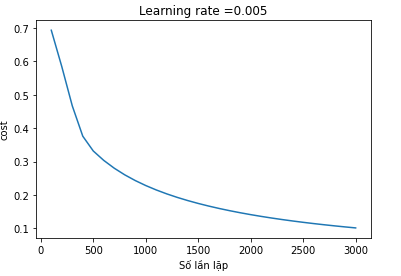
</div>

số lần lặp: 4000

train accuracy: 99.52153110047847 %

test accuracy: 70.0 %
<div>
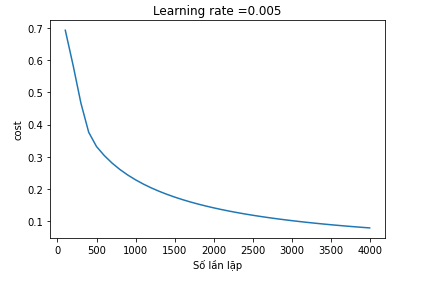
</div>